<a href="https://colab.research.google.com/github/Vitor-Santos-Cacula/Projetos-de-Dados/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_S%C3%A3o_Francisco%2C_California%2C_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *São Francisco, California, EUA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade São Francisco, California, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import branca as b

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* ... **id** - Número de id gerado para identificar cada imóvel 
* ... **Nome** - Nome da propriedade anunciada
* ... **id_Anfitriao** - Número de identificação do anfitrião
* ... **Nome_Anfitriao** - Nome do anfitrião
* ... **Grupo_Bairro** - Não há informações relevantes
* ... **Bairro** - Nome do bairro
* ... **Latitude** - coordenada da latitude da propriedade
* ... **longitude** - coordenada da longitude da propriedade
* ... **Tipo_Quarto** - informa o tipo de quarto que é oferecido
* ... **Preco** - Preço do imóvel
* ... **Noites_Minimas** - quantidade mínima de noites para reservar
* ... **Numero_Reviews** - número de reviews que a propriedade possui
* ... **Ultimo_Review** - data do último review
* ... **Reviews_Por_Mes** - quantidade de reviews por mês
* ... **Imoveis_Do_Anfitriao** - quantidade de imóveis do mesmo anfitrião
* ... **Disponibilidade_365** - número de dias de disponibilidade dentro de 365 dias
* ... **Numero_Reviews_12** - número de reviews que a propriedade teve nos últimos 12 meses 
* ... **Licenca** - Licença da propriedade


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,194,2,371,2022-11-18,2.28,1,161,57,City Registration Pending
1,487499,Mission District - Perfect Location,1682183,Daniel,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,192,2022-10-31,1.51,1,356,5,NaN
2,144978,Prime Location - Small Basic Room,216682,Jay,NaN,Pacific Heights,37.79233,-122.42431,Private room,55,30,120,2020-03-31,0.86,9,54,0,NaN
3,490931,"Mission's ""La Lengua""",1269188,Maureen,NaN,Bernal Heights,37.74766,-122.42041,Private room,100,30,79,2015-08-01,0.75,1,358,0,NaN
4,147443,Best Views in all of San Francisco,709325,Mark,NaN,Diamond Heights,37.74633,-122.44591,Entire home/apt,167,30,112,2022-09-30,0.80,5,187,2,STR-0000672


**Renomeando Colunas**


In [5]:
df.columns = ['id','Nome','id_Anfitriao','Nome_Anfitriao','Grupo_Bairro','Bairro','Latitude','longitude','Tipo_Quarto','Preco','Noites_Minimas','Numero_Reviews','Ultimo_Review','Reviews_Por_Mes','Imoveis_Do_Anfitriao','Disponibilidade_365','Numero_Reviews_12','Licenca']
df.head(1)

,id,Nome,id_Anfitriao,Nome_Anfitriao,Grupo_Bairro,Bairro,Latitude,longitude,Tipo_Quarto,Preco,Noites_Minimas,Numero_Reviews,Ultimo_Review,Reviews_Por_Mes,Imoveis_Do_Anfitriao,Disponibilidade_365,Numero_Reviews_12,Licenca
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,194,2,371,2022-11-18,2.28,1,161,57,City Registration Pending


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [ ]:

print("Entradas:\t {}".format(df.shape[0]))
print("Variávies:\t {}".format(df.shape[1]))

display(df.dtypes)

Entradas:	 6789
Variávies:	 18


id                        int64
Nome                     object
id_Anfitriao              int64
Nome_Anfitriao           object
Grupo_Bairro            float64
Bairro                   object
Latitude                float64
longitude               float64
Tipo_Quarto              object
Preco                     int64
Noites_Minimas            int64
Numero_Reviews            int64
Ultimo_Review            object
Reviews_Por_Mes         float64
Imoveis_Do_Anfitriao      int64
Disponibilidade_365       int64
Numero_Reviews_12         int64
Licenca                  object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `Grupo_Bairro` possui 100% dos seus valores faltantes. 
* A variável `Licenca` possui valores nulos em quase metade das linhas.
* As variáveis `Reviews_Por_Mes` e `Ultimo_Review` têm aproximadamente 19% dos valores nulos.

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

Grupo_Bairro            1.000000
Licenca                 0.397260
Reviews_Por_Mes         0.180734
Ultimo_Review           0.180734
Noites_Minimas          0.000000
Numero_Reviews_12       0.000000
Disponibilidade_365     0.000000
Imoveis_Do_Anfitriao    0.000000
Numero_Reviews          0.000000
id                      0.000000
Nome                    0.000000
Tipo_Quarto             0.000000
longitude               0.000000
Latitude                0.000000
Bairro                  0.000000
Nome_Anfitriao          0.000000
id_Anfitriao            0.000000
Preco                   0.000000
dtype: float64

###**Preenchendo valores ausentes**
Como a coluna `Grupo_Bairro` não terá nenhuma utilidade, iremos exclui-la.

Já a coluna `Reviews_Por_Mes` pode ser importante para nossa análise.
Para não jogarmos fora informações úteis, iremos utilizar um método direto e simples para preencher os dados faltantes, que consiste em substituir os valores nulos de uma coluna do tipo numérico com **Mediana** da coluna.

In [6]:
del df['Grupo_Bairro']

Reviews_Mes_Mediana = df['Reviews_Por_Mes'].median()

df.fillna({"Reviews_Por_Mes":Reviews_Mes_Mediana},inplace=True)

df.isnull().sum()

id                         0
Nome                       0
id_Anfitriao               0
Nome_Anfitriao             0
Bairro                     0
Latitude                   0
longitude                  0
Tipo_Quarto                0
Preco                      0
Noites_Minimas             0
Numero_Reviews             0
Ultimo_Review           1227
Reviews_Por_Mes            0
Imoveis_Do_Anfitriao       0
Disponibilidade_365        0
Numero_Reviews_12          0
Licenca                 2697
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5c6456640>,
      dtype=object)

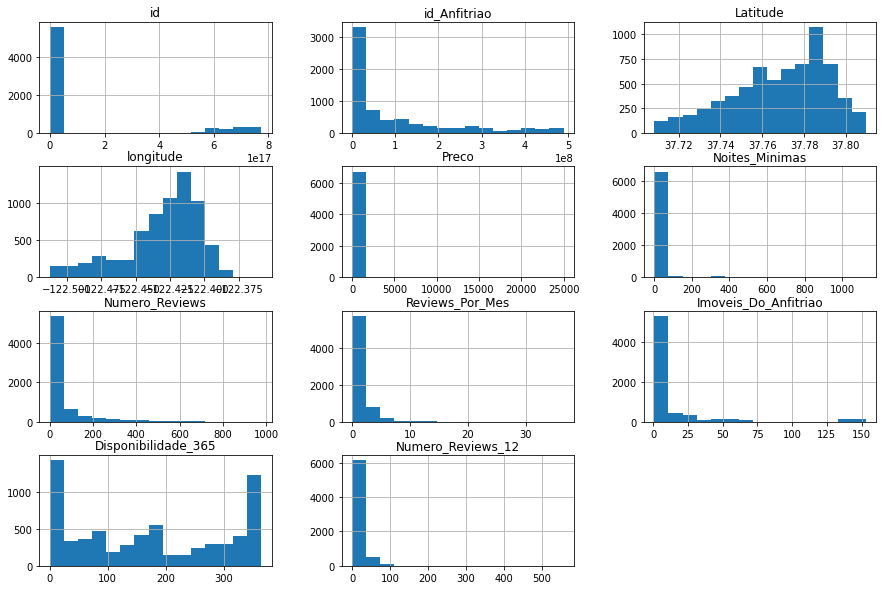

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize =(15,10))

### **Q4. Há *outliers* presentes?**


Através do Histograma é possível notar indícios de presenças de outliers. Por exemplo as variáveis `Preco`, `Noites_Minimas`.


Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver a média da coluna `price``
df[['Preco','Noites_Minimas','Numero_Reviews','Reviews_Por_Mes','Imoveis_Do_Anfitriao','Disponibilidade_365','Numero_Reviews_12']].describe()

,Preco,Noites_Minimas,Numero_Reviews,Reviews_Por_Mes,Imoveis_Do_Anfitriao,Disponibilidade_365,Numero_Reviews_12
count,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000
mean,268.709088,23.556930,48.659449,1.222335,13.667256,173.049345,10.637207
std,944.974389,53.748277,94.476154,1.827792,31.192535,133.141768,22.925957
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,99.000000,2.000000,1.000000,0.260000,1.000000,46.000000,0.000000
50%,150.000000,6.000000,8.000000,0.580000,2.000000,164.000000,2.000000
75%,250.000000,30.000000,49.000000,1.390000,9.000000,310.000000,10.000000
max,25000.000000,1125.000000,977.000000,36.490000,153.000000,365.000000,558.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 250, porém seu valor máximo é 25000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

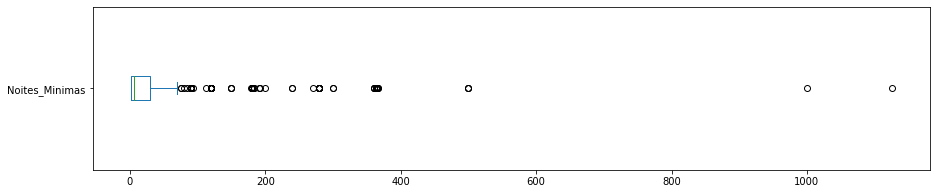

Noites Mínimas acima de 30:
Quantidade de entradas: 544


In [ ]:
df['Noites_Minimas'].plot(kind='box', vert = False, figsize=(15,3) )
plt.show()


print("Noites Mínimas acima de 30:")
print("Quantidade de entradas: {}".format(len(df.loc[df['Noites_Minimas']>30])))

#### Boxplot para price


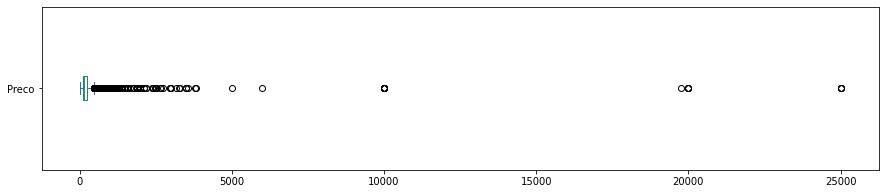

Preços acima de 1000:
Quantidade de entradas: 127


In [ ]:
df['Preco'].plot(kind='box',vert = False,figsize=(15,3))
plt.show()

print("Preços acima de 1000:")
print("Quantidade de entradas: {}".format(len(df.loc[df['Preco']>1000])))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f927b0bbfd0>,
      dtype=object)

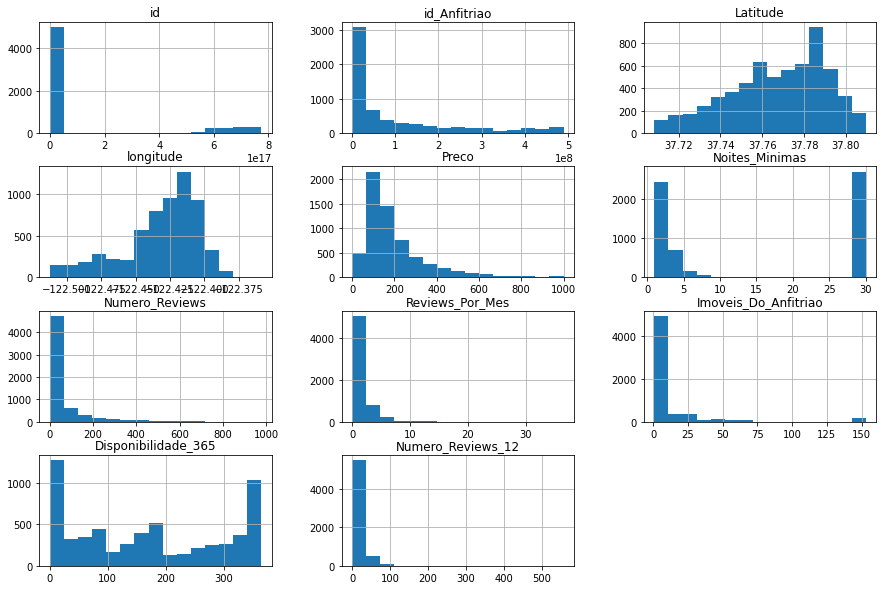

In [7]:
df_clean = df.copy()
df_clean.drop(df_clean.loc[df_clean['Noites_Minimas']>30].index,axis = 0,inplace=True)
df_clean.drop(df_clean.loc[df_clean['Preco']>1000].index,axis=0,inplace=True)

df_clean.hist(bins=15,figsize=(15,10))

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Utilizando o Mapa de calor conseguimos ver correlação entre as variaveis `Reviews_Por_Mes` e `Numero_Reviews_12`.
O que significa que quanto mais reviews o imóvel tiver por mês, consequentemente terá mais reviews ao longo de 12 meses.   

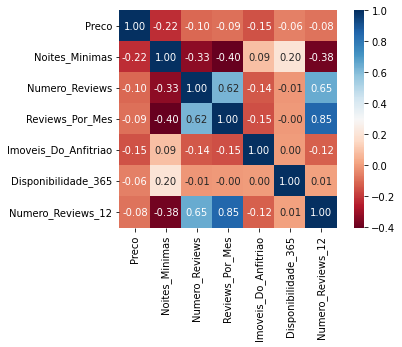

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['Preco','Noites_Minimas','Numero_Reviews','Reviews_Por_Mes','Imoveis_Do_Anfitriao','Disponibilidade_365','Numero_Reviews_12']].corr()
# mostrar a matriz de correlação
sns.heatmap(corr,cmap ='RdBu',fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Analisando o gráfico de barras abaixo, o tipo de imóvel mais alugado é o `Entire home/apt`, que contempla aproximadamente **64%** dos imóveis alugados.

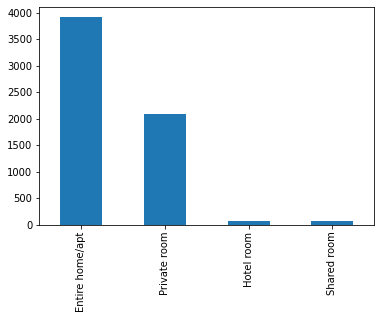

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
data_plot = df_clean['Tipo_Quarto'].value_counts()
data_plot.plot(kind='bar')

In [ ]:
df_clean['Tipo_Quarto'].value_counts()/df_clean.shape[0]

Entire home/apt    0.638263
Private room       0.340679
Hotel room         0.010774
Shared room        0.010284
Name: Tipo_Quarto, dtype: float64

###**Noites Mínimas**

Analisando a gráfico abaixo é possivel identificar que quase **50%** dos imóveis alugam-se por no mínimo 30 dias.

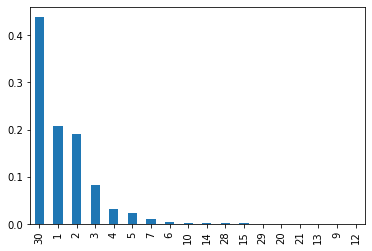

In [ ]:
data_plot = df_clean['Noites_Minimas'].value_counts()/df_clean.shape[0]
data_plot.plot(kind='bar')

### **Q6. Qual a localidade mais cara do dataset?**



Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros a partir do preço de locação.


In [ ]:
df_clean.groupby('Bairro').Preco.mean().sort_values(ascending=False).head(5)

Bairro
Presidio           320.875000
Seacliff           292.600000
North Beach        289.496454
Russian Hill       288.112782
Diamond Heights    277.916667
Name: Preco, dtype: float64

###**Mapa**
Através do mapa plotado abaixo é possível observar a dispersão de alguns imóveis ao redor de São Francisco.
Foram criadas duas colunas no dataset: 

**`Valor`** que categoriza os preços dos imóveis definidos como `Baixo`,`Medio`,`Alto` ou `Super Alto`.

**`Cores`** categoriza em cores com base no `Valor`, para complementar a legenda do gráfico de Mapa.

**Legenda**

**Verde** - Imóveis mais baratos comparado à média

**Azul** - Imóveis de preço médio

**Laranja** - Imóveis de preço alto

**Vermelho** - Imóveis com preços super altos

In [8]:

df_clean['Valor'] = 'N/A'
df_clean['Cores'] = 'N/A'

df_clean.loc[df_clean['Preco']<=100, ['Valor','Cores']] = ['Baixo','lightgreen']
df_clean.loc[(df_clean['Preco']>100) & (df_clean['Preco'] <= 149), ['Valor','Cores']] = ['Medio','blue'] 
df_clean.loc[(df_clean['Preco']>149) & (df_clean['Preco'] <= 243), ['Valor','Cores']] = ['Alto','orange'] 
df_clean.loc[(df_clean['Preco']>243) & (df_clean['Preco'] <= 1000), ['Valor','Cores']] = ['Super Alto','red'] 

data_plot = df_clean[['Bairro','Latitude','longitude','Preco','Cores']].sample(100)

import folium
mapa = folium.Map()
for index, location_info in data_plot.iterrows():
    folium.Marker([location_info['Latitude'],location_info['longitude']], popup = location_info[['Bairro','Preco']],icon = folium.Icon(color = location_info['Cores']), zoom_scale =14).add_to(mapa)
mapa

###**Gráfico de dispersão baseado nas Noites Mínimas dos imóveis**

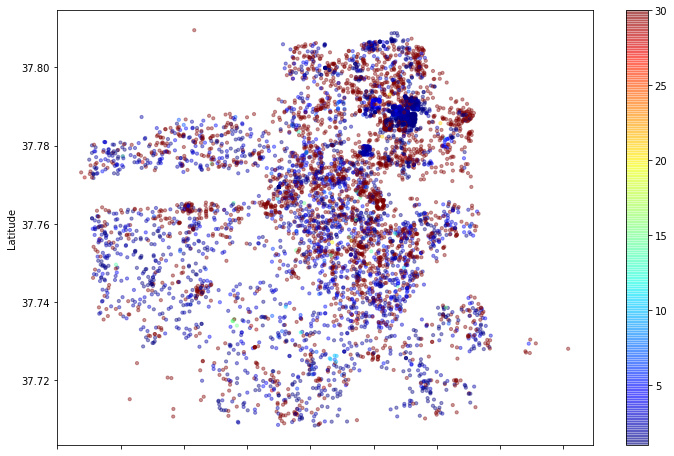

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='Latitude', alpha=0.4, c=df_clean['Noites_Minimas'], s=10,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que a maioria dos imóveis são do tipo Casas/Apartamentos e com 30 noites mínimas para aluga-los.

As duas localidades mais caras de São Francisco: `Presidio` e `Seacliff` são regiões mais próximas do Golden State (ponto turíistico).

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial.
